# Data Analysis of Hungarian speakers on the comprehension of English polysemous words

Done by Sonia Horvathova 2074445

## Importing and Installing libraries and functions

In [12]:
#Installing important libraries
!pip install pandas
!pip install statsmodels
!pip install matplotlib
!pip install scikit-learn
!pip install imbalanced-learn
!pip install scipy
!pip install numpy
#C:\path\to\python.exe -m pip install --upgrade pip

#Importing functions and libraries as shortcuts
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.utils.class_weight import compute_sample_weight


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Data Loading

In [2]:
#Loading the dataset
df = pd.read_csv(r"C:\Users\User\Downloads\Polysemy data_final\Polysemy_data.csv")
#Checking if everything works as intended
#print (df.head())

## Data Cleaning and Preparation

In [3]:
#Grouping up columns that will be dropped from the dataset
#Columns not part of the survey or polysemous test
columns_to_remove = ['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId', 'RecipientLastName', 'RecipientFirstName', 
                     'RecipientEmail', 'ExternalReference', 'LocationLatitude', 'LocationLongitude', 'DistributionChannel', 'UserLanguage']

#Removing unnecessary data from the experiment/surbey
columns_to_remove_experiment = ['Q17_6_TEXT', 'Q20_8_TEXT', 'QID2_First Click', 'QID2_Last Click', 'QID2_Page Submit', 'QID2_Click Count', 'Example A', 'Example B','Time_Last Click', 'Time_Page Submit', 'Time_Click Count',
                                  'Time_Last Click.1','Time_Page Submit.1', 'Time_Click Count.1','Time_Last Click.2', 'Time_Page Submit.2', 'Time_Click Count.2', 'Time_Last Click.3', 
                                  'Time_Page Submit.3', 'Time_Click Count.3', 'Time_Last Click.4','Time_Page Submit.4', 'Time_Click Count.4','Time_Last Click.5', 'Time_Page Submit.5',
                                  'Time_Click Count.5', 'Time_Last Click.6', 'Time_Page Submit.6', 'Time_Click Count.6', 'Time_Last Click.7','Time_Page Submit.7', 'Time_Click Count.7',
                                  'Time_Last Click.8', 'Time_Page Submit.8', 'Time_Click Count.8', 'Time_Last Click.9', 'Time_Page Submit.9', 'Time_Click Count.9', 'Time_Last Click.10',
                                  'Time_Page Submit.10', 'Time_Click Count.10', 'Time_Last Click.11', 'Time_Page Submit.11', 'Time_Click Count.11','Time_Last Click.12', 'Time_Page Submit.12',
                                  'Time_Click Count.12','Time_Last Click.13', 'Time_Page Submit.13', 'Time_Click Count.13', 'Time_Last Click.14', 'Time_Page Submit.14', 'Time_Click Count.14',
                                  'Time_Last Click.15', 'Time_Page Submit.15', 'Time_Click Count.15', 'Time_Last Click.16', 'Time_Page Submit.16', 'Time_Click Count.16','Time_Last Click.17',
                                  'Time_Page Submit.17', 'Time_Click Count.17','Time_Last Click.18','Time_Page Submit.18', 'Time_Click Count.18', 'Time_Last Click.19', 'Time_Page Submit.19',
                                  'Time_Click Count.19', 'Time_Last Click.20', 'Time_Page Submit.20', 'Time_Click Count.20','Time_Last Click.21', 'Time_Page Submit.21', 'Time_Click Count.21',
                                  'Time_Last Click.22', 'Time_Page Submit.22', 'Time_Click Count.22', 'Time_Last Click.23', 'Time_Page Submit.23', 'Time_Click Count.23','Time_Last Click.24',
                                  'Time_Page Submit.24', 'Time_Click Count.24','Time_Last Click.25', 'Time_Page Submit.25', 'Time_Click Count.25', 'Time_Last Click.26', 'Time_Page Submit.26',
                                  'Time_Click Count.26', 'Time_Last Click.27', 'Time_Page Submit.27', 'Time_Click Count.27', 'Time_Last Click.28', 'Time_Page Submit.28', 'Time_Click Count.28',
                                  'Time_Last Click.29', 'Time_Page Submit.29', 'Time_Click Count.29','Q97'
                                 ]


In [4]:
#Removing first set of columns (background)
df_cleaned = df.drop(columns=columns_to_remove)
#print (df_cleaned.head())

#Removing second set of columns (experiment)
df_fully_cleaned = df_cleaned.drop(columns=columns_to_remove_experiment)
#print (df_fully_cleaned.head())

#Listing of all columns names for better access
#columns_list = df.columns.tolist()
#print(columns_list)

#Removing rows with missing data
final_data = df_fully_cleaned.dropna()

#Droping first two rows as they contain irrelevant data
data = final_data.iloc[2:].reset_index(drop=True)

#print(data)

### Renaming columns

In [5]:
#Renaming columns for clarity
column_mapping = {
    'Q24': 'Statement of Consent',
    'Q14': 'Gender',
    'Q15': 'Age',
    'Q17': 'Education_Level',
    'Q16': 'English_Proficiency',
    'Q19': 'Language_Use_Frequency',
    'Q20': 'Language_Use_Context',
}

data.rename(columns=column_mapping, inplace=True)
#Printing data to confirm the changes
#print(data)

#Initially used for assigning categories

category_mappings = {

    'Gender': {1: 'Male', 2: 'Female', 3: 'Other'},
    'Education_Level': {
        1: 'High school',
        2: 'College',
        3: "Bachelor's degree",
        4: "Master's degree",
        5: 'Doctorate',
        6: 'Other',
    },
    'English_Proficiency": {
        1: 'Beginner (A1-A2)',
        2: 'Intermediate (B1-B2)',
        3: 'Advanced (C1)',
        4: 'Fluent/Proficient (C2)',
    },
    'Language_Use_Frequency': {
        1: 'Daily',
        2: '4-6 times a week',
        3: '2-3 times a week',
        4: 'Once a week',
        5: 'Once a month',
        6: 'Rarely',
        7: 'Never',
    },
}

In [6]:
#Creating a mapping for timer columns based on their stimulus column
renaming = {}

#Iterating through columns and checking the stimulus type in the next column
for i, col in enumerate(data.columns):
    if "Time_First Click" in col:
        if i + 1 < len(data.columns):
            next_col = data.columns[i + 1]
            if "Polysemous" in next_col:
                renaming[col] = f"timer_polysemy_{len(renaming) + 1}"
            elif "Monosemic" in next_col:
                renaming[col] = f"timer_monosemic_{len(renaming) + 1}"

# Renaming the columns in the dataset
data.rename(columns=renaming, inplace=True)

# Display renamed columns to confirm changes
#print(data.columns)

In [11]:
#Checking for correct renaming
#columns_list = data.columns.tolist()
#print(columns_list)

#Checking data due to error (missing values)
#print(data["Polysemous.2"])

### Data Simplification

In [8]:
#Counting the options selected by individuals for use context
def count_contexts(list_):
    if pd.isna(list_):
        return 0
    return len(str(list_).split(','))

#Adding a new column for the count
data['Use_context_count'] = data['Language_Use_Context'].apply(count_contexts)

#Confirming the changes in dataset
data[['Language_Use_Context', 'Use_context_count']].head()


Language_Use_Context  Use_context_count
0            3,4,5,6,7                  5
1          1,3,4,5,6,7                  6
2          1,3,4,5,6,7                  6
3            2,4,5,6,7                  5
4              3,4,6,7                  4

In [9]:
#Combining reaction times and accuracies for polysemous and monosemic stimuli into lists
#Looking for common text for the individual columns
polysemy_timers = [col for col in data.columns if "timer_polysemy" in col]
monosemy_timers = [col for col in data.columns if "timer_monosemic" in col]

polysemous = [col for col in data.columns if "Polysemous" in col]
monosemic = [col for col in data.columns if "Monosemic" in col]

#Assuring that all the data is numerical
data[polysemous] = data[polysemous].apply(pd.to_numeric, errors='coerce')
data[monosemic] = data[monosemic].apply(pd.to_numeric, errors='coerce')

data[polysemy_timers] = data[polysemy_timers].apply(pd.to_numeric, errors='coerce')
data[monosemy_timers] = data[monosemy_timers].apply(pd.to_numeric, errors='coerce')

#Calculating the mean accuracies and reaction times
data['Polysemous_Accuracy'] = data[polysemous].mean(axis=1)
data['Monosemic_Accuracy'] = data[monosemic].mean(axis=1)

data['Polysemous_RT'] = data[polysemy_timers].mean(axis=1)
data['Monosemic_RT'] = data[monosemy_timers].mean(axis=1)


### Data balancing

In [13]:
#Adding weights to imbalanced data
weights_ed = compute_sample_weight('balanced', data['Education_Level'])
weights_ep = compute_sample_weight('balanced', data['English_Proficiency'])
weights_ef = compute_sample_weight('balanced', data['Language_Use_Frequency'])
weights_ec = compute_sample_weight('balanced', data['Use_context_count'])

combined_weights = (weights_ed + weights_ep + weights_ef + weights_ec) / 4
#print(weights_ed)

## Data analysis

### Accuraccies between polysemous and monosemic stimuli

In [14]:
#Calculating the accuracies for polysemous and monosemic columns
polysemous_accuracy = data[polysemous].mean()
monosemic_accuracy = data[monosemic].mean()

#Looking for the most accurate and most inaccurate polysemous and monosemic stimuli
most_accurate_polysemous = polysemous_accuracy.idxmax()
most_inaccurate_polysemous = polysemous_accuracy.idxmin()
most_accurate_monosemic = monosemic_accuracy.idxmax()
most_inaccurate_monosemic = monosemic_accuracy.idxmin()

#Getting the accuracy values for tho most and least accurate columns
most_accurate_polysemous_value = polysemous_accuracy.max()
most_inaccurate_polysemous_value = polysemous_accuracy.min()
most_accurate_monosemic_value = monosemic_accuracy.max()
most_inaccurate_monosemic_value = monosemic_accuracy.min()

#Printing the results
print("Accuracy for Polysemous stimuli:")
print(polysemous_accuracy)
print("Accuracy for Monosemic stimuli:")
print(monosemic_accuracy)

print(f"Most accurate Polysemous stimulus was {most_accurate_polysemous} with accuracy {most_accurate_polysemous_value}")
print(f"Most inaccurate Polysemous stimulus was {most_inaccurate_polysemous} with accuracy {most_inaccurate_polysemous_value}")
print(f"Most accurate Monosemic stimulus was {most_accurate_monosemic} with accuracy {most_accurate_monosemic_value}")
print(f"Most inaccurate Monosemic stimulus was {most_inaccurate_monosemic} with accuracy {most_inaccurate_monosemic_value}")

Accuracy for Polysemous stimuli:
Polysemous       0.771429
Polysemous.1     0.571429
Polysemous.2     0.942857
Polysemous.3     0.857143
Polysemous.4     0.571429
Polysemous.5     0.885714
Polysemous.6     0.657143
Polysemous.7     0.828571
Polysemous.8     0.685714
Polysemous.9     0.742857
Polysemous.10    0.371429
Polysemous.11    0.971429
Polysemous.12    0.542857
Polysemous.13    0.857143
Polysemous.14    0.914286
dtype: float64
Accuracy for Monosemic stimuli:
Monosemic       0.714286
Monosemic.1     0.828571
Monosemic.2     0.942857
Monosemic.3     1.000000
Monosemic.4     0.771429
Monosemic.5     0.914286
Monosemic.6     0.971429
Monosemic.7     0.600000
Monosemic.8     0.742857
Monosemic.9     1.000000
Monosemic.10    0.800000
Monosemic.11    0.857143
Monosemic.12    1.000000
Monosemic.13    1.000000
Monosemic.14    1.000000
dtype: float64
Most accurate Polysemous stimulus was Polysemous.11 with accuracy 0.9714285714285714
Most inaccurate Polysemous stimulus was Polysemous.10 w

### RandomForrestRegression Analysis

In [15]:
#Setting the target variables for iteration
targets = ['Polysemous_RT', 'Monosemic_RT', 'Polysemous_Accuracy', 'Monosemic_Accuracy']

#Setting predicting variables
X_ed = data[['Education_Level']]
X_ep = data[['English_Proficiency']]
X_ef = data[['Language_Use_Frequency']]
X_ec = data[['Use_context_count']]

#print(X_ed)

### Education Level

In [16]:
#Creating empty dictionaries for storing
models_ed = {}
results_ed = {}

#Iterating through targets amd training the RandomForrestRegressor on Education Level
for target in targets:
    y = data[target]
    rf_model_ed = RandomForestRegressor()
    #Fitting the model
    rf_model_ed.fit(X_ed, y, sample_weight=weights_ed)
    predictions_ed = rf_model_ed.predict(X_ed)
    #Evaluating model performance using R^2 and MSE scores
    r2_ed = r2_score(y, predictions_ed)
    mse_ed = mean_squared_error(y, predictions_ed)
    #Storing data
    models_ed[target] = rf_model_ed
    results_ed[target] = {'R² Score': r2_ed, 'MSE': mse_ed}
    
    #Printing the results
    print(f"Results for {target} Education Level:")
    print(f"R² Score:{r2_ed}")
    print(f"Mean Squared Error: {mse_ed}")

Results for Polysemous_RT Education Level:
R² Score:0.03324787840273302
Mean Squared Error: 15.218469206847756
Results for Monosemic_RT Education Level:
R² Score:0.013696899988639988
Mean Squared Error: 11.09963265965184
Results for Polysemous_Accuracy Education Level:
R² Score:0.10631172129806699
Mean Squared Error: 0.026892519124004827
Results for Monosemic_Accuracy Education Level:
R² Score:0.09167813133357194
Mean Squared Error: 0.014335419968068797


### English Frequency

In [17]:
#Creating empty dictionaries for storing
models_ep = {}
results_ep = {}

#Iterating through targets amd training the RandomForrestRegressor on English Proficiency
for target in targets:
    y = data[target]
    rf_model = RandomForestRegressor()
    #Fitting the model
    rf_model.fit(X_ep, y, sample_weight=weights_ep)
    predictions_ep = rf_model.predict(X_ep)
    #Evaluating model performance using R^2 and MSE scores
    r2_ep = r2_score(y, predictions_ep)
    mse_ep = mean_squared_error(y, predictions_ep)
    #Storing data
    models_ep[target] = rf_model
    results_ep[target] = {'R² Score': r2_ep, 'MSE': mse_ep}
    
    #Printing the results
    print(f"Results for {target} English Proficiency:")
    print(f"R² Score:{r2_ep}")
    print(f"Mean Squared Error: {mse_ep}")

Results for Polysemous_RT English Proficiency:
R² Score:0.11114256488508756
Mean Squared Error: 13.992262549395386
Results for Monosemic_RT English Proficiency:
R² Score:0.08142572674236304
Mean Squared Error: 10.33742771735077
Results for Polysemous_Accuracy English Proficiency:
R² Score:0.21367393882963825
Mean Squared Error: 0.02366181714774414
Results for Monosemic_Accuracy English Proficiency:
R² Score:0.03318306073203503
Mean Squared Error: 0.01525860747688217


### Use Frequency

In [18]:
#Creating empty dictionaries for storing
models_ef = {}
results_ef = {}

#Iterating through targets amd training the RandomForrestRegressor on Use Frequency
for target in targets:
    y = data[target]
    rf_model = RandomForestRegressor()
    #Fitting the model
    rf_model.fit(X_ef, y, sample_weight=weights_ef)
    predictions_ef = rf_model.predict(X_ef)
    #Evaluating model performance using R^2 and MSE scores
    r2_ef = r2_score(y, predictions_ef)
    mse_ef = mean_squared_error(y, predictions_ef)
    #Storing data
    models_ef[target] = rf_model
    results_ef[target] = {'R² Score': r2_ef, 'MSE': mse_ef}
    
    #Printing the results
    print(f"Results for {target} Use Frequency:")
    print(f"R² Score:{r2_ef}")
    print(f"Mean Squared Error: {mse_ef}")

Results for Polysemous_RT Use Frequency:
R² Score:0.11319652089930898
Mean Squared Error: 13.959929476980706
Results for Monosemic_RT Use Frequency:
R² Score:0.08224041719556874
Mean Squared Error: 10.328259374716742
Results for Polysemous_Accuracy Use Frequency:
R² Score:0.05203751371760568
Mean Squared Error: 0.028525717410344407
Results for Monosemic_Accuracy Use Frequency:
R² Score:0.14674428551992813
Mean Squared Error: 0.013466348691114061


### Use Context

In [19]:
#Creating empty dictionaries for storing
models_ec = {}
results_ec = {}

#Iterating through targets amd training the RandomForrestRegressor on Use Contexts
for target in targets:
    y = data[target]
    rf_model = RandomForestRegressor()
    #Fitting the model
    rf_model.fit(X_ec, y, sample_weight=weights_ec)
    predictions_ec = rf_model.predict(X_ec)
    #Evaluating model performance using R^2 and MSE scores
    r2_ec = r2_score(y, predictions_ec)
    mse_ec = mean_squared_error(y, predictions_ec)
    #Storing data
    models_ec[target] = rf_model
    results_ec[target] = {'R² Score': r2_ec, 'MSE': mse_ec}
    
    print(f"Results for {target} Use Context:")
    print(f"R² Score:{r2_ec}")
    print(f"Mean Squared Error: {mse_ec}")

Results for Polysemous_RT Use Context:
R² Score:0.20219216760109882
Mean Squared Error: 12.558973142241054
Results for Monosemic_RT Use Context:
R² Score:0.28370141364242996
Mean Squared Error: 8.06106275353424
Results for Polysemous_Accuracy Use Context:
R² Score:0.022023944050615696
Mean Squared Error: 0.02942887404279072
Results for Monosemic_Accuracy Use Context:
R² Score:0.20564765553019415
Mean Squared Error: 0.012536717273264964


### All factors combined (for the heatmap)

In [20]:
X_all = data[['Education_Level', 'English_Proficiency', 'Language_Use_Frequency', 'Use_context_count']]

models_all = {}
results_all = {}

#Iterating through targets amd training the RandomForrestRegressor on Use Contexts
for target in targets:
    y = data[target]
    rf_model_all = RandomForestRegressor()
    #Fitting the model
    rf_model_all.fit(X_all, y, sample_weight=combined_weights)
    predictions_all = rf_model_all.predict(X_all)
    #Evaluating model performance using R^2 and MSE scores
    r2_all = r2_score(y, predictions_all)
    mse_all = mean_squared_error(y, predictions_all)
    #Storing data
    models_all[target] = rf_model_all
    results_all[target] = {'R² Score': r2_all, 'MSE': mse_all}

## Visualization of data

### ScatterPlots

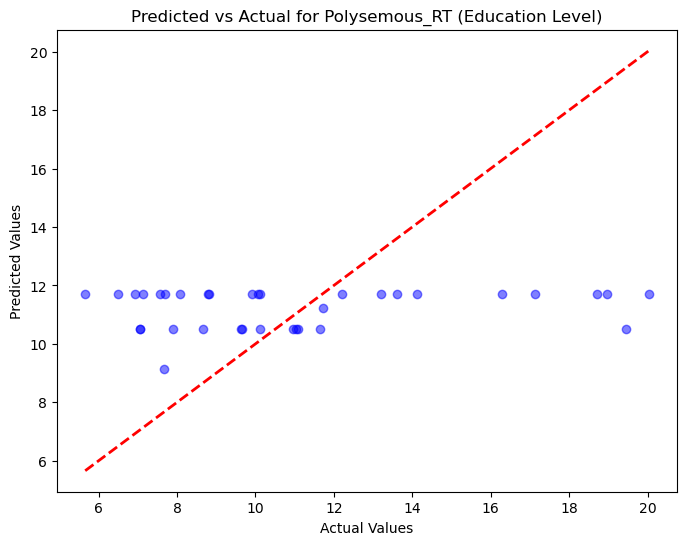

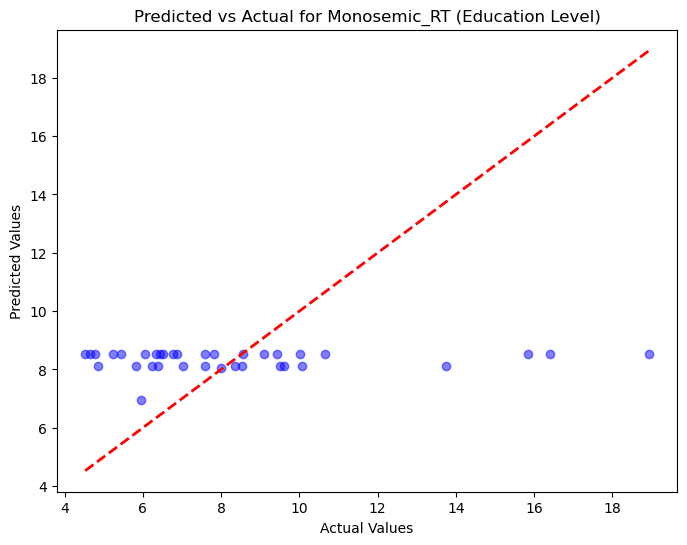

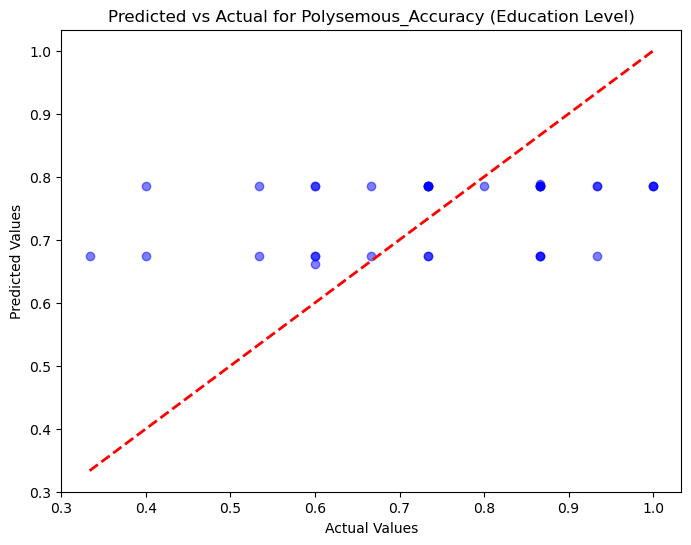

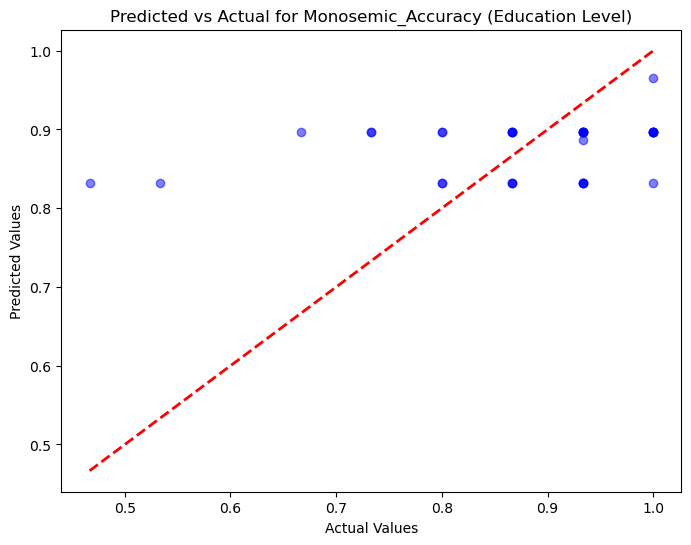

In [21]:
#Visualizing the predictive power of Education using scatterplot
#Iterating through variables
for target in targets:
    y = data[target]
    predictions_ed = models_ed[target].predict(X_ed)
    
    #Plotting the data
    plt.figure(figsize=(8, 6))
    plt.scatter(y, predictions_ed, alpha=0.5, color='blue')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', lw=2)
    plt.title(f'Predicted vs Actual for {target} (Education Level)')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()


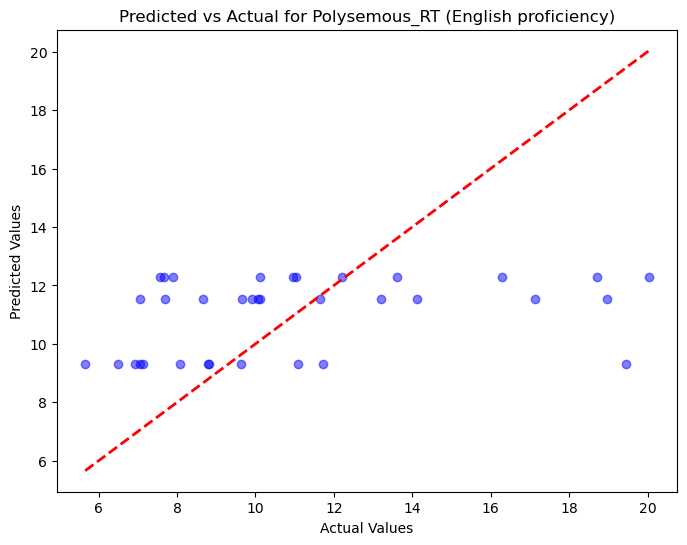

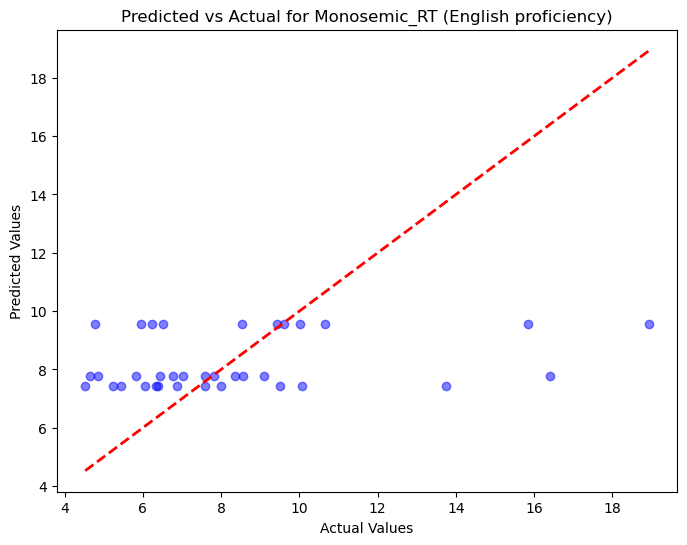

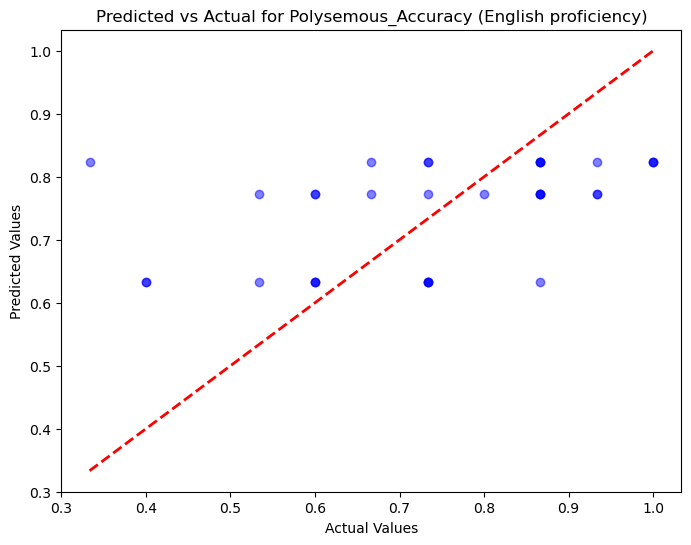

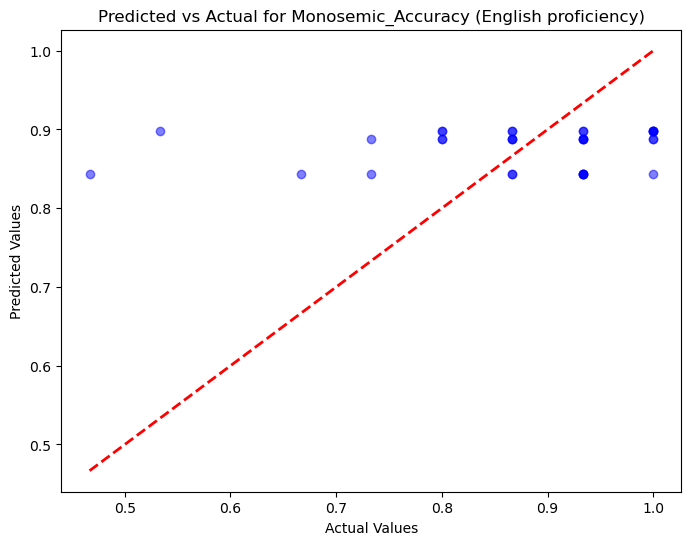

In [22]:
#Visualizing the predictive power of Education using scatterplot
#Iterating through variables
for target in targets:
    y = data[target]
    predictions_ep = models_ep[target].predict(X_ep)
    
    #Plotting the data
    plt.figure(figsize=(8, 6))
    plt.scatter(y, predictions_ep, alpha=0.5, color='blue')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', lw=2)
    plt.title(f'Predicted vs Actual for {target} (English proficiency)')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()


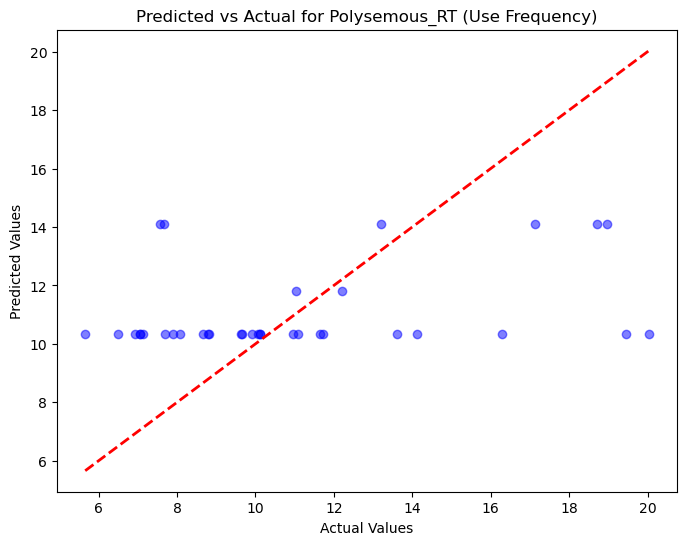

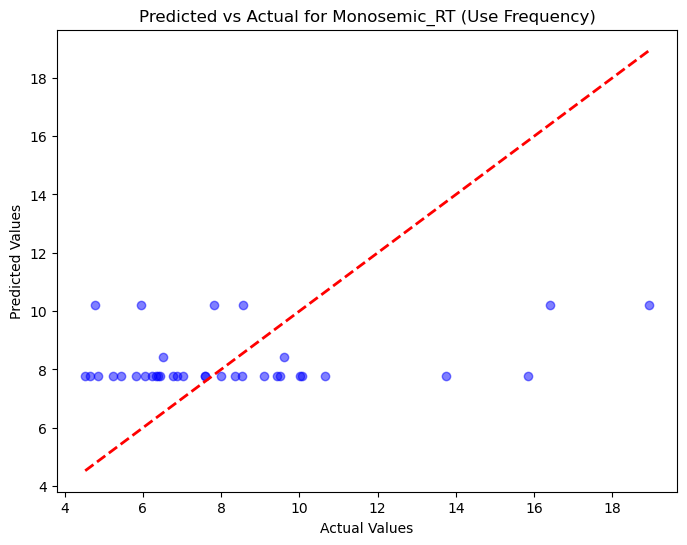

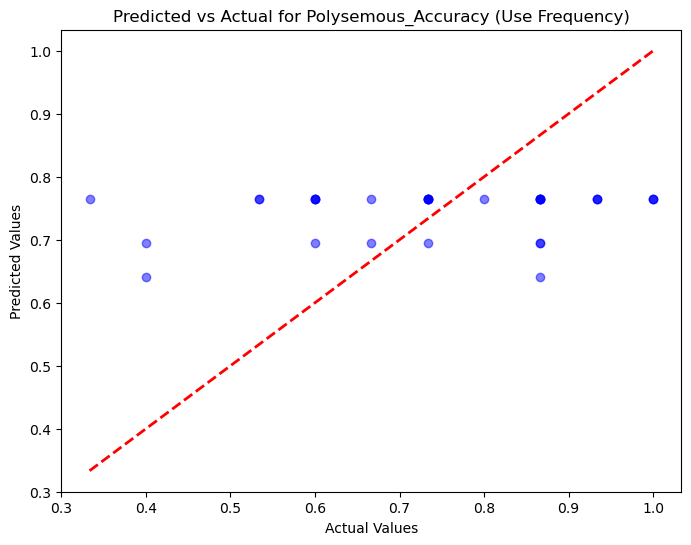

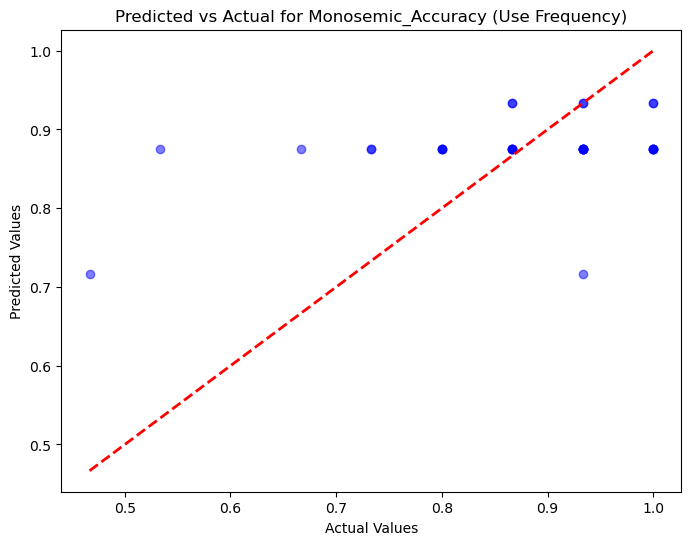

In [23]:
#Visualizing the predictive power of Education using scatterplot
#Iterating through variables
for target in targets:
    y = data[target]
    predictions_ef = models_ef[target].predict(X_ef)
    
    #Plotting the data
    plt.figure(figsize=(8, 6))
    plt.scatter(y, predictions_ef, alpha=0.5, color='blue')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', lw=2)
    plt.title(f'Predicted vs Actual for {target} (Use Frequency)')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()


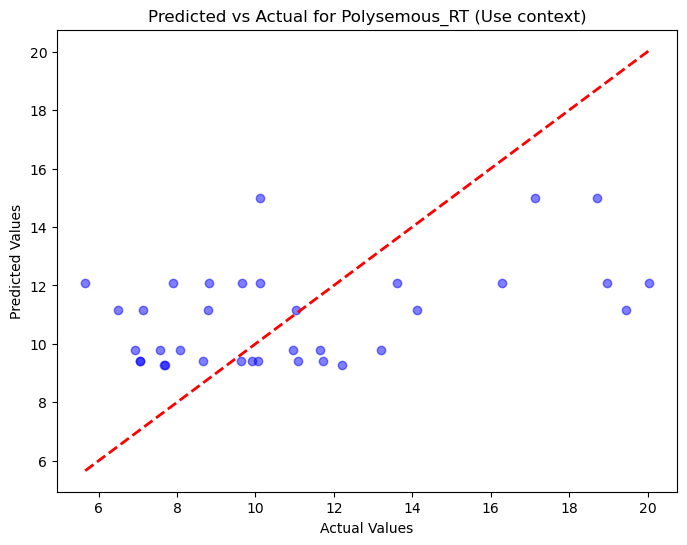

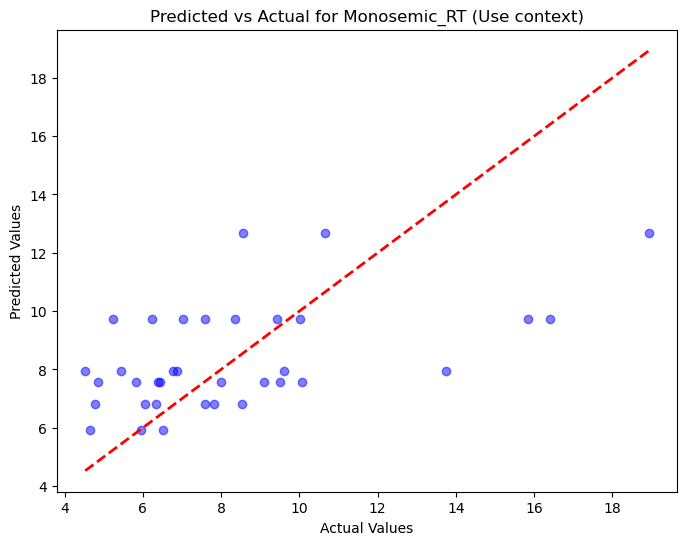

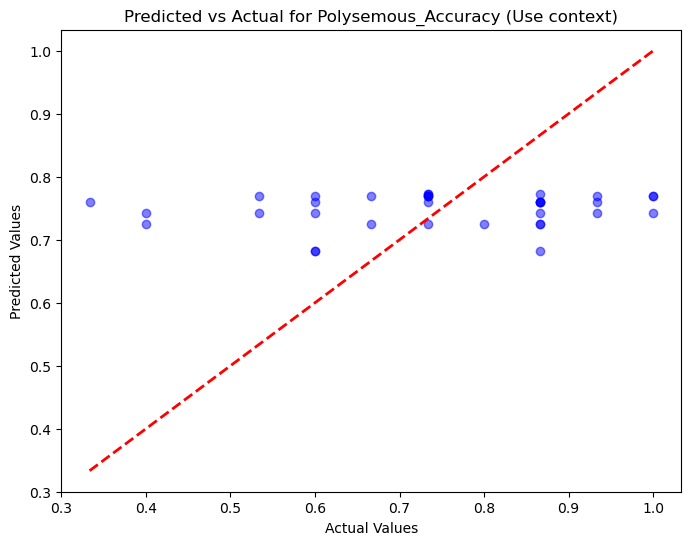

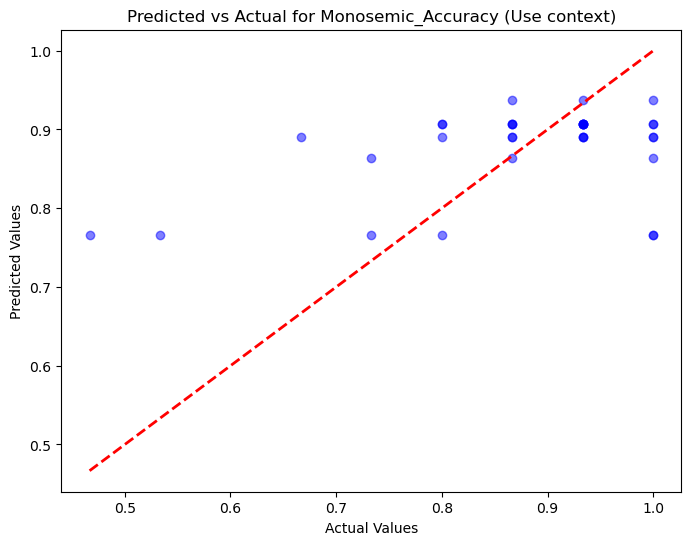

In [24]:
#Visualizing the predictive power of Education using scatterplot
#Iterating through variables
for target in targets:
    y = data[target]
    predictions_ec = models_ec[target].predict(X_ec)
    
    #Plotting the data
    plt.figure(figsize=(8, 6))
    plt.scatter(y, predictions_ec, alpha=0.5, color='blue')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', lw=2)
    plt.title(f'Predicted vs Actual for {target} (Use context)')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()


### Heatmap of all factors

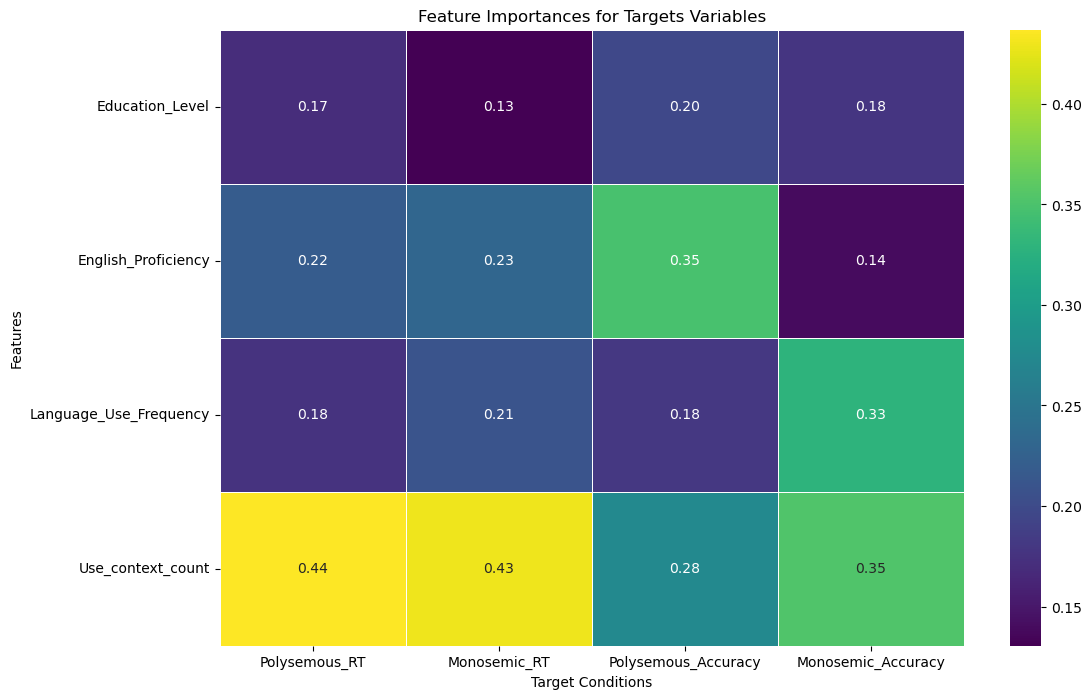

In [25]:
#Collecting feature importances for each target
feature_importances_all = {}
for target in targets:
    rf_model_all = models_all[target]
    feature_importances_all[target] = rf_model_all.feature_importances_

#Creating a dataframe for feature importances
feature_importances_df = pd.DataFrame(feature_importances_all, index=X_all.columns)

import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(feature_importances_df, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Feature Importances for Targets Variables')
plt.xlabel('Target Conditions')
plt.ylabel('Features')
plt.show()